In [3]:
from neo4j import GraphDatabase
import getpass
import pandas as pd
import numpy as np
from itertools import combinations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [4]:
uri = "bolt://localhost:7687"
username = "neo4j"
password = getpass.getpass("Enter your Neo4j password: ")

driver = GraphDatabase.driver(uri, auth=(username, password))

def execute_query(driver, query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]

# get ALL nodes and edges WHERE eval_set <> "test"


In [5]:

query_order_nodes = """
MATCH (o:Order)
WHERE o.eval_set <> 'test'
RETURN id(o) as node_id, labels(o) as labels, properties(o) as properties
"""


order_nodes = execute_query(driver, query_order_nodes)
order_nodes

[<Record node_id=0 labels=['Order'] properties={'order_number': '1', 'order_hour_of_day': '8', 'eval_set': 'prior', 'order_dow': '2', 'user_id': '1', 'order_id': '2539329'}>,
 <Record node_id=1 labels=['Order'] properties={'order_number': '2', 'days_since_prior_order': '15.0', 'order_hour_of_day': '7', 'eval_set': 'prior', 'order_dow': '3', 'user_id': '1', 'order_id': '2398795'}>,
 <Record node_id=2 labels=['Order'] properties={'order_number': '3', 'days_since_prior_order': '21.0', 'order_hour_of_day': '12', 'eval_set': 'prior', 'order_dow': '3', 'user_id': '1', 'order_id': '473747'}>,
 <Record node_id=3 labels=['Order'] properties={'order_number': '4', 'days_since_prior_order': '29.0', 'order_hour_of_day': '7', 'eval_set': 'prior', 'order_dow': '4', 'user_id': '1', 'order_id': '2254736'}>,
 <Record node_id=4 labels=['Order'] properties={'order_number': '5', 'days_since_prior_order': '28.0', 'order_hour_of_day': '15', 'eval_set': 'prior', 'order_dow': '4', 'user_id': '1', 'order_id': '

In [6]:

query_product_nodes = """
MATCH (p:Product)
RETURN id(p) as node_id, labels(p) as labels, properties(p) as properties
"""

product_nodes = execute_query(driver, query_product_nodes)
product_nodes

[<Record node_id=3214653 labels=['Product'] properties={'aisle_id': '61', 'product_id': '1', 'department_id': '19', 'product_name': 'Chocolate Sandwich Cookies'}>,
 <Record node_id=3214654 labels=['Product'] properties={'aisle_id': '104', 'product_id': '2', 'department_id': '13', 'product_name': 'All-Seasons Salt'}>,
 <Record node_id=3214655 labels=['Product'] properties={'aisle_id': '94', 'product_id': '3', 'department_id': '7', 'product_name': 'Robust Golden Unsweetened Oolong Tea'}>,
 <Record node_id=3214656 labels=['Product'] properties={'aisle_id': '38', 'product_id': '4', 'department_id': '1', 'product_name': 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce'}>,
 <Record node_id=3214657 labels=['Product'] properties={'aisle_id': '5', 'product_id': '5', 'department_id': '13', 'product_name': 'Green Chile Anytime Sauce'}>,
 <Record node_id=3214658 labels=['Product'] properties={'aisle_id': '11', 'product_id': '6', 'department_id': '11', 'product_name': 'Dry Nose Oi

In [7]:
# Create a mapping of aisle_id to product_name using the product nodes

aisle_id_product_name_mapping = {record['properties']['product_id']: record['properties']['product_name'] for record in product_nodes}
aisle_id_product_name_mapping


{'1': 'Chocolate Sandwich Cookies',
 '2': 'All-Seasons Salt',
 '3': 'Robust Golden Unsweetened Oolong Tea',
 '4': 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce',
 '5': 'Green Chile Anytime Sauce',
 '6': 'Dry Nose Oil',
 '7': 'Pure Coconut Water With Orange',
 '8': "Cut Russet Potatoes Steam N' Mash",
 '9': 'Light Strawberry Blueberry Yogurt',
 '10': 'Sparkling Orange Juice & Prickly Pear Beverage',
 '11': 'Peach Mango Juice',
 '12': 'Chocolate Fudge Layer Cake',
 '13': 'Saline Nasal Mist',
 '14': 'Fresh Scent Dishwasher Cleaner',
 '15': 'Overnight Diapers Size 6',
 '16': 'Mint Chocolate Flavored Syrup',
 '17': 'Rendered Duck Fat',
 '18': 'Pizza for One Suprema  Frozen Pizza',
 '19': 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 '20': 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 '21': 'Small & Medium Dental Dog Treats',
 '22': 'Fresh Breath Oral Rinse Mild Mint',
 '23': 'Organic Turkey Burgers',
 '24': 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops fo

In [21]:
# Print aisle id where product name contains "banana" or "avocado" or "spinach" or "strawberry" or "onion"
# use the aisle_id_product_name_mapping to get the aisle_id

for product_name in ["Banana", "Avocado", "spinach", "strawberry", "onion"]:
    for aisle_id, name in aisle_id_product_name_mapping.items():
        if product_name in name:
            print(f"{product_name} is in aisle {aisle_id}")

Banana is in aisle 63
Banana is in aisle 313
Banana is in aisle 426
Banana is in aisle 602
Banana is in aisle 849
Banana is in aisle 866
Banana is in aisle 911
Banana is in aisle 1017
Banana is in aisle 1018
Banana is in aisle 1229
Banana is in aisle 1348
Banana is in aisle 1349
Banana is in aisle 1400
Banana is in aisle 1443
Banana is in aisle 1457
Banana is in aisle 1466
Banana is in aisle 1474
Banana is in aisle 1621
Banana is in aisle 1653
Banana is in aisle 2011
Banana is in aisle 2110
Banana is in aisle 2189
Banana is in aisle 2459
Banana is in aisle 2477
Banana is in aisle 2484
Banana is in aisle 2745
Banana is in aisle 2760
Banana is in aisle 2829
Banana is in aisle 2848
Banana is in aisle 2865
Banana is in aisle 2933
Banana is in aisle 3438
Banana is in aisle 3527
Banana is in aisle 3879
Banana is in aisle 4106
Banana is in aisle 4189
Banana is in aisle 4216
Banana is in aisle 4509
Banana is in aisle 4654
Banana is in aisle 4708
Banana is in aisle 4856
Banana is in aisle 4950


In [8]:


query_edges =   """
                MATCH (o:Order)-[r:ORDERED]->(p:Product)
                WHERE o.eval_set <> 'test'
                RETURN id(o) as start_node, id(p) as end_node, properties(r) as properties
                """

edges = execute_query(driver, query_edges)

driver.close()




In [6]:
edges

[<Record start_node=2 end_node=3347750 properties={'add_to_cart_order': '5.0', 'reordered': '0.0'}>,
 <Record start_node=2 end_node=3330967 properties={'add_to_cart_order': '4.0', 'reordered': '0.0'}>,
 <Record start_node=2 end_node=3271866 properties={'add_to_cart_order': '3.0', 'reordered': '1.0'}>,
 <Record start_node=2 end_node=3278949 properties={'add_to_cart_order': '2.0', 'reordered': '1.0'}>,
 <Record start_node=2 end_node=3239964 properties={'add_to_cart_order': '1.0', 'reordered': '1.0'}>,
 <Record start_node=4 end_node=3280790 properties={'add_to_cart_order': '8.0', 'reordered': '1.0'}>,
 <Record start_node=4 end_node=3380381 properties={'add_to_cart_order': '7.0', 'reordered': '0.0'}>,
 <Record start_node=4 end_node=3304938 properties={'add_to_cart_order': '6.0', 'reordered': '0.0'}>,
 <Record start_node=4 end_node=3271934 properties={'add_to_cart_order': '5.0', 'reordered': '0.0'}>,
 <Record start_node=4 end_node=3330967 properties={'add_to_cart_order': '4.0', 'reordered':

# Aisle-Department association rules

In [9]:
#product_id_mapping = {product['node_id']: product['properties']['product_name'] for product in product_nodes}
order_id_mapping = {order['node_id']: order['properties']['order_id'] for order in order_nodes}

aisle_id_mapping = {product['node_id']:product['properties']['aisle_id'] for product in product_nodes} 
department_id_mapping = {product['node_id'] : product['properties']['department_id'] for product in product_nodes}


transactions_dict_aisle = {}
transactions_dict_dept = {}

for edge in edges:
    order_id = order_id_mapping[edge['start_node']]
    aisle_id = aisle_id_mapping[edge['end_node']]
    department_id = department_id_mapping[edge['end_node']]
    
    if order_id not in transactions_dict_aisle.keys():
        #transactions_dict_aisle[order_id] = []
        transactions_dict_aisle[order_id] = set ()

    if order_id not in transactions_dict_dept.keys():
        #transactions_dict_aisle[order_id] = []
        transactions_dict_dept[order_id] = set ()
    
    transactions_dict_aisle[order_id].add(aisle_id)
    transactions_dict_dept[order_id].add(department_id)


transactions_aisle = list(transactions_dict_aisle.values())
transactions_dept = list(transactions_dict_dept.values())
# for transaction in transactions:
#     transaction.sort()



In [10]:
# find transactions_aisle with only one item

transactions_aisle_single = []
for transaction in transactions_aisle:
    if len(transaction) == 1:
        transactions_aisle_single.append(transaction)
    
# find transactions_dept with only one item
        
transactions_dept_single = []
for transaction in transactions_dept:
    if len(transaction) == 1:
        transactions_dept_single.append(transaction)

# find transactions_aisle with more than one item
        
transactions_aisle_multi = []
for transaction in transactions_aisle:
    if len(transaction) > 1:
        transactions_aisle_multi.append(transaction)

# find transactions_dept with more than one item

transactions_dept_multi = []
for transaction in transactions_dept:
    if len(transaction) > 1:
        transactions_dept_multi.append(transaction)

In [11]:

# Initialize TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions_aisle_multi).transform(transactions_aisle_multi)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()

,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## A-priori Algorithm 

In [12]:

# Adjust the min_support 
min_support_threshold = 0.01
frequent_itemsets = apriori(df, min_support=min_support_threshold, use_colnames=True)

# Adjust the min_threshold 
min_confidence_threshold = 0.04
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)


In [13]:
frequent_itemsets_apriori = frequent_itemsets

In [14]:
frequent_itemsets_apriori

,support,itemsets
0,0.020877,(1)
1,0.023266,(100)
2,0.055625,(104)
3,0.029801,(105)
4,0.089284,(106)
...,...,...
3327,0.011204,"(21, 24, 84, 83, 123, 112)"
3328,0.017578,"(21, 24, 84, 83, 123, 120)"
3329,0.010221,"(21, 86, 24, 83, 123, 120)"
3330,0.010391,"(21, 24, 83, 123, 120, 91)"


In [15]:
# Sort by support with itemsets containing more than 2 item

frequent_itemsets_apriori_2 = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].map(len) > 1].sort_values(by='support', ascending=False)
frequent_itemsets_apriori_2

,support,itemsets
729,0.340653,"(83, 24)"
496,0.290620,"(123, 24)"
530,0.252450,"(83, 123)"
1877,0.201250,"(83, 123, 24)"
412,0.200204,"(120, 24)"
...,...,...
2641,0.010005,"(37, 115, 83, 24)"
2487,0.010003,"(108, 112, 83, 123)"
3198,0.010002,"(24, 83, 123, 112, 31)"
3166,0.010000,"(84, 83, 123, 120, 107)"


In [16]:
# Print department_id and product_name for top 10 frequent itemsets with more than 2 item

for index, row in frequent_itemsets_apriori_2.head().iterrows():
    print("Support: ", row['support'])
    print("Itemset: ", row['itemsets'])
    for item in row['itemsets']:
        print ("Product Name: ", item)
        print("Product Name: ", aisle_id_product_name_mapping[item])
    print("\n")

Support:  0.34065259424479877
Itemset:  frozenset({'83', '24'})
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Support:  0.29062031320119514
Itemset:  frozenset({'123', '24'})
Product Name:  123
Product Name:  Sherry Reserve Vinegar
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Support:  0.2524502730125471
Itemset:  frozenset({'83', '123'})
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread
Product Name:  123
Product Name:  Sherry Reserve Vinegar


Support:  0.2012502022778572
Itemset:  frozenset({'83', '123', '24'})
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread
Product Name:  123
Product Name:  Sherry Reserve Vinegar
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Support:  0.20020419636884138
Itemset:  frozenset({'120', '24'})
Product Name:  120
Product Name

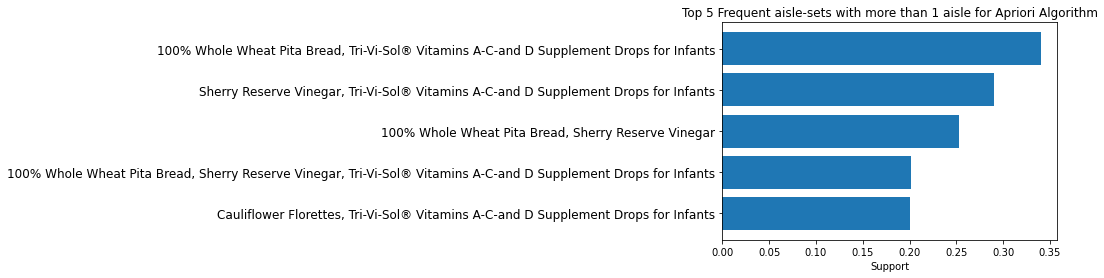

In [50]:
# plot frequent_itemsets_apriori_2 with product name and itemset

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(frequent_itemsets_apriori_2.head()['itemsets'].map(lambda x: ', '.join(aisle_id_product_name_mapping[item] for item in x)), frequent_itemsets_apriori_2.head()['support'], align='center')
ax.set_yticks(frequent_itemsets_apriori_2.head()['itemsets'].map(lambda x: ', '.join(aisle_id_product_name_mapping[item] for item in x)))
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Support')
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
ax.set_title('Top 5 Frequent aisle-sets with more than 1 aisle for Apriori Algorithm')
plt.show()


In [ ]:
filtered_frequent_itemsets_apriori.info()

In [16]:
# Split the itemsets into separate columns - Source and Target

filtered_frequent_itemsets_apriori['source'] = filtered_frequent_itemsets_apriori['itemsets'].apply(lambda x: list(x)[0])
filtered_frequent_itemsets_apriori['target'] = filtered_frequent_itemsets_apriori['itemsets'].apply(lambda x: list(x)[1])
filtered_frequent_itemsets = filtered_frequent_itemsets_apriori.rename({'support': 'weight'}, axis='columns')
filtered_frequent_itemsets

/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,weight,itemsets,source,target
98,0.010415,"(123, 1)",123,1
99,0.013767,"(24, 1)",24,1
100,0.010577,"(83, 1)",83,1
101,0.012020,"(123, 100)",123,100
102,0.015511,"(24, 100)",24,100
...,...,...,...,...
3327,0.011204,"(24, 83, 123, 112, 21, 84)",24,83
3328,0.017578,"(24, 83, 123, 21, 120, 84)",24,83
3329,0.010221,"(24, 83, 123, 86, 21, 120)",24,83
3330,0.010391,"(24, 83, 123, 91, 21, 120)",24,83


In [17]:
filtered_frequent_itemsets_ap_plot = filtered_frequent_itemsets_apriori[['source', 'target', 'weight']].copy()

/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


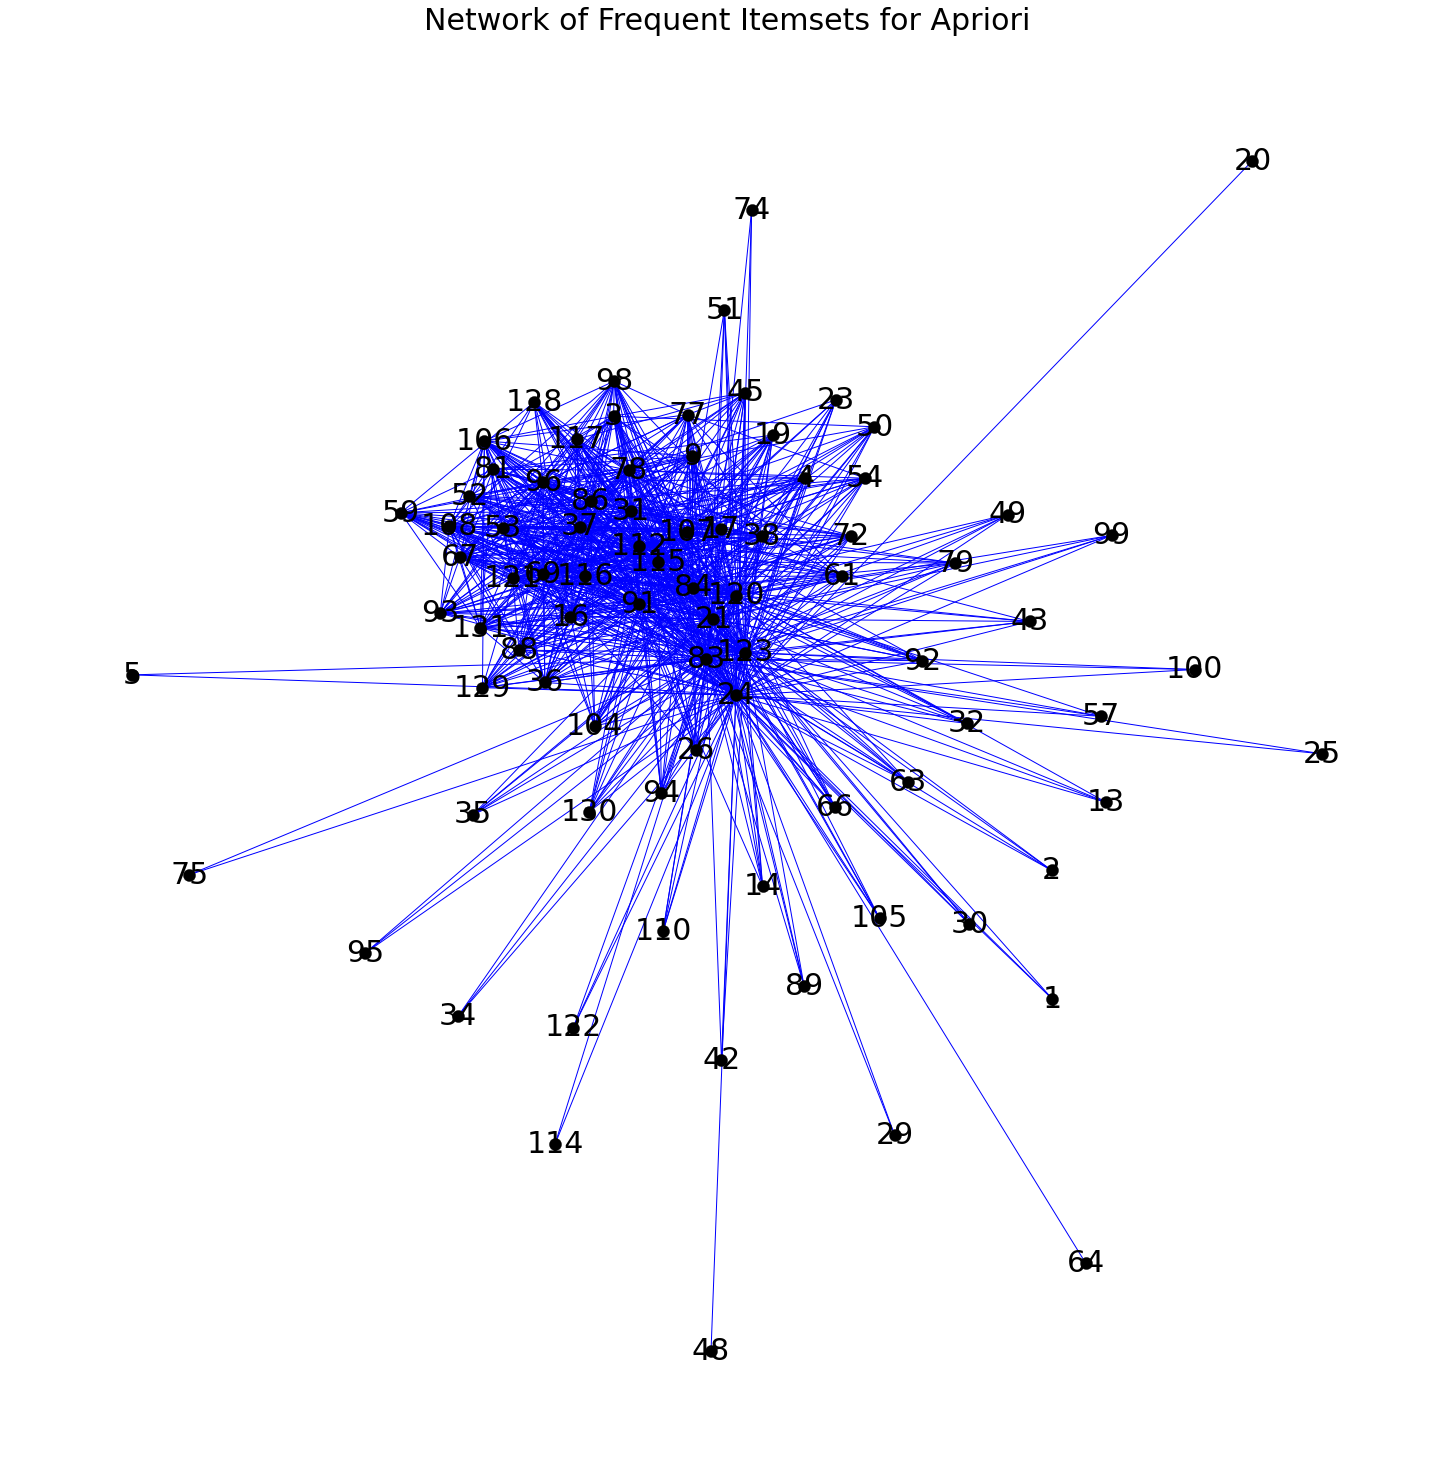

In [18]:
# import networkx and plot network for frequent itemsets

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G = nx.from_pandas_edgelist(filtered_frequent_itemsets_ap_plot, 'source', 'target', ['weight'])

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=150, font_size=30, linewidths=0.25, node_color='black', edge_color='blue', pos=pos)
plt.title('Network of Frequent Itemsets for Apriori', size=30)
plt.show()


## FP growth Algorithm

I did not implement from scratch here either


In [23]:
frequent_itemsets_fp = fpgrowth(df, min_support=min_support_threshold, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence_threshold)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(21),(24),0.244664,0.586311,0.166131,0.679020,1.158121,0.022682,1.288829,0.180758
1,(24),(21),0.586311,0.244664,0.166131,0.283350,1.158121,0.022682,1.053983,0.330037
2,(21),(120),0.244664,0.277992,0.093141,0.380691,1.369430,0.025127,1.165828,0.357151
3,(120),(21),0.277992,0.244664,0.093141,0.335050,1.369430,0.025127,1.135929,0.373637
4,(21),(84),0.244664,0.255994,0.083178,0.339970,1.328041,0.020546,1.127231,0.327022
...,...,...,...,...,...,...,...,...,...,...
23615,"(86, 83)",(9),0.091375,0.066446,0.010129,0.110850,1.668268,0.004057,1.049940,0.440859
23616,"(9, 83)",(86),0.043701,0.146840,0.010129,0.231776,1.578433,0.003712,1.110563,0.383207
23617,(86),"(9, 83)",0.146840,0.043701,0.010129,0.068979,1.578433,0.003712,1.027151,0.429533
23618,(9),"(86, 83)",0.066446,0.091375,0.010129,0.152437,1.668268,0.004057,1.072045,0.429087


In [24]:
frequent_itemsets_fp

,support,itemsets
0,0.244664,(21)
1,0.091002,(77)
2,0.085064,(117)
3,0.082653,(88)
4,0.048192,(23)
...,...,...
3327,0.012205,"(24, 9, 107)"
3328,0.011104,"(9, 83, 107)"
3329,0.010562,"(9, 86, 24)"
3330,0.010129,"(86, 9, 83)"


In [25]:
# Split the itemsets into separate columns - Source and Target

filtered_frequent_itemsets_fp = frequent_itemsets_fp[frequent_itemsets_fp['itemsets'].apply(lambda x: len(x) >= 2)]

filtered_frequent_itemsets_fp['source'] = filtered_frequent_itemsets_fp['itemsets'].apply(lambda x: list(x)[0])
filtered_frequent_itemsets_fp['target'] = filtered_frequent_itemsets_fp['itemsets'].apply(lambda x: list(x)[1] if len(x) > 1 else "")
filtered_frequent_itemsets_fp = filtered_frequent_itemsets_fp.rename({'support': 'weight'}, axis='columns')
filtered_frequent_itemsets_fp

/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weight,itemsets,source,target
98,0.166131,"(21, 24)",21,24
99,0.093141,"(21, 120)",21,120
100,0.083178,"(21, 84)",21,84
101,0.122099,"(21, 123)",21,123
102,0.144868,"(21, 83)",21,83
...,...,...,...,...
3327,0.012205,"(24, 9, 107)",24,9
3328,0.011104,"(9, 83, 107)",9,83
3329,0.010562,"(9, 86, 24)",9,86
3330,0.010129,"(86, 9, 83)",86,9


In [26]:
# Print department_id and product_name for top 10 frequent itemsets with more than 2 item

for index, row in filtered_frequent_itemsets_fp.head().iterrows():
    print("Weight: ", row['weight'])
    print("Itemset: ", row['itemsets'])
    for item in row['itemsets']:
        print ("Product Name: ", item)
        print("Product Name: ", aisle_id_product_name_mapping[item])
    print("\n")

Weight:  0.1661314297249188
Itemset:  frozenset({'21', '24'})
Product Name:  21
Product Name:  Small & Medium Dental Dog Treats
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Weight:  0.09314123749005293
Itemset:  frozenset({'21', '120'})
Product Name:  21
Product Name:  Small & Medium Dental Dog Treats
Product Name:  120
Product Name:  Cauliflower Florettes


Weight:  0.08317832315409986
Itemset:  frozenset({'21', '84'})
Product Name:  21
Product Name:  Small & Medium Dental Dog Treats
Product Name:  84
Product Name:  Lamb Shank


Weight:  0.12209908528701768
Itemset:  frozenset({'21', '123'})
Product Name:  21
Product Name:  Small & Medium Dental Dog Treats
Product Name:  123
Product Name:  Sherry Reserve Vinegar


Weight:  0.14486848185671888
Itemset:  frozenset({'21', '83'})
Product Name:  21
Product Name:  Small & Medium Dental Dog Treats
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread




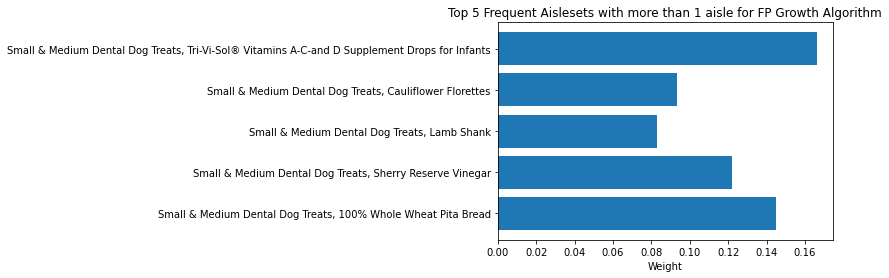

In [51]:
# plot frequent_itemsets_apriori_2 with product name and itemset

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(filtered_frequent_itemsets_fp.head()['itemsets'].map(lambda x: ', '.join(aisle_id_product_name_mapping[item] for item in x)), filtered_frequent_itemsets_fp.head()['weight'], align='center')
ax.set_yticks(filtered_frequent_itemsets_fp.head()['itemsets'].map(lambda x: ', '.join(aisle_id_product_name_mapping[item] for item in x)))
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weight')
ax.set_title('Top 5 Frequent Aislesets with more than 1 aisle for FP Growth Algorithm')
plt.show()

In [22]:
# import networkx and plot network for frequent itemsets

filtered_frequent_itemsets_plot_fp = filtered_frequent_itemsets_fp[['source', 'target', 'weight']].copy().head(25)
filtered_frequent_itemsets_plot_fp

,source,target,weight
98,21,24,0.166131
99,21,120,0.093141
100,21,84,0.083178
101,21,123,0.122099
102,21,83,0.144868
103,21,24,0.073717
104,21,120,0.060443
105,21,123,0.054446
106,21,24,0.051837
107,21,24,0.046883


/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


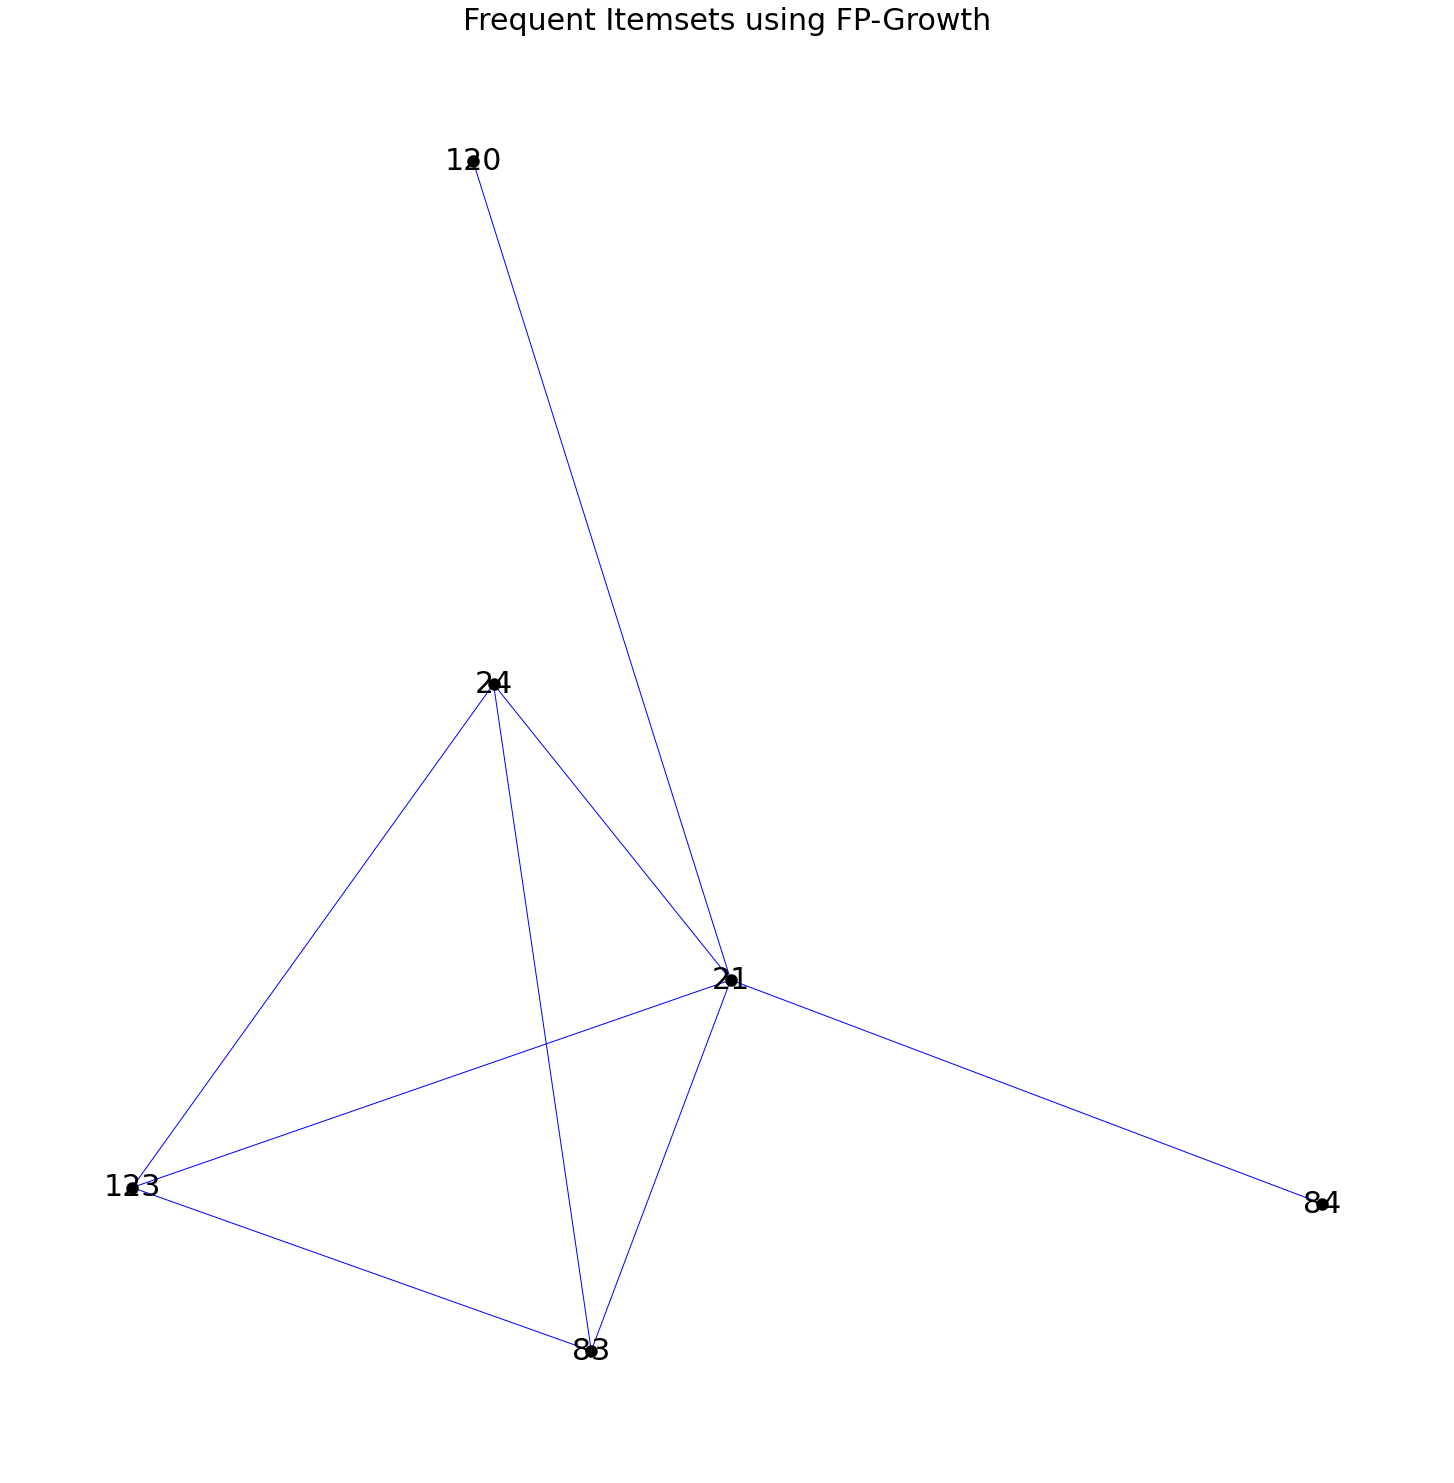

In [23]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G = nx.from_pandas_edgelist(filtered_frequent_itemsets_plot_fp, 'source', 'target', ['weight'])

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=150, font_size=30, linewidths=0.25, node_color='black', edge_color='blue', pos=pos)
plt.title("Frequent Itemsets using FP-Growth", size=30)
plt.show()

In [24]:
import plotly.express as px
# to have a same origin
df_table["all"] = "Top 50 items" 
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

ModuleNotFoundError: No module named 'plotly'

## ECLAT ALGORITHM

In [29]:

def eclat(prefix, items, frequent_itemsets, min_support, transactions_len):
    while items:
        item, tidset = items.pop(0)
        itemset = prefix.copy()
        itemset.add(item)
        support = len(tidset) / transactions_len
        if support >= min_support:

            frequent_itemsets.append((itemset, support))
            suffix = []
            for other_item, other_tidset in items:
                new_tidset = tidset & other_tidset  # Intersection of tidsets
                if len(new_tidset) >= min_support * transactions_len:
                    suffix.append((other_item, new_tidset))

            eclat(itemset, suffix, frequent_itemsets, min_support, transactions_len)


def run_eclat(transactions, min_support):

    data = {}
    transactions_len = len(transactions)
    for i, transaction in enumerate(transactions):
        for item in transaction:
            if item not in data:
                data[item] = set()
            data[item].add(i)

    # Convert to list of tuples and sort by frequency
    sorted_items = sorted(data.items(), key=lambda x: len(x[1]), reverse=True)


    frequent_itemsets = []
    eclat(set(), sorted_items, frequent_itemsets, min_support, transactions_len)
    return frequent_itemsets


min_support_threshold = 0.007 
frequent_itemsets_eclat = run_eclat(transactions_aisle_multi, min_support_threshold)

for itemset in frequent_itemsets_eclat:
    if len(itemset[0]) >=2:
        print(f"itemset: {itemset[0]} --> Confidence: {round(itemset[1],3)}")

itemset: {'83', '24'} --> Confidence: 0.341
itemset: {'83', '123', '24'} --> Confidence: 0.201
itemset: {'120', '83', '123', '24'} --> Confidence: 0.082
itemset: {'24', '84', '83', '123', '120'} --> Confidence: 0.035
itemset: {'21', '120', '24', '84', '83', '123'} --> Confidence: 0.018
itemset: {'120', '115', '24', '84', '83', '123'} --> Confidence: 0.008
itemset: {'120', '24', '91', '84', '83', '123'} --> Confidence: 0.008
itemset: {'120', '24', '107', '84', '83', '123'} --> Confidence: 0.009
itemset: {'112', '120', '24', '84', '83', '123'} --> Confidence: 0.012
itemset: {'120', '86', '24', '84', '83', '123'} --> Confidence: 0.01
itemset: {'31', '120', '24', '84', '83', '123'} --> Confidence: 0.007
itemset: {'120', '116', '24', '84', '83', '123'} --> Confidence: 0.009
itemset: {'78', '120', '24', '84', '83', '123'} --> Confidence: 0.008
itemset: {'120', '24', '96', '84', '83', '123'} --> Confidence: 0.008
itemset: {'120', '24', '67', '84', '83', '123'} --> Confidence: 0.007
itemset: {

In [27]:
frequent_itemsets_eclat

[({'24'}, 0.5863113360681855),
 ({'24', '83'}, 0.34065259424479877),
 ({'123', '24', '83'}, 0.2012502022778572),
 ({'120', '123', '24', '83'}, 0.08153507623164276),
 ({'120', '123', '24', '83', '84'}, 0.034775942865055226),
 ({'120', '123', '21', '24', '83', '84'}, 0.017577737257329133),
 ({'115', '120', '123', '24', '83', '84'}, 0.007984344945055495),
 ({'120', '123', '24', '83', '84', '91'}, 0.008272955825852529),
 ({'107', '120', '123', '24', '83', '84'}, 0.009223870288594197),
 ({'112', '120', '123', '24', '83', '84'}, 0.011972346740115077),
 ({'120', '123', '24', '83', '84', '86'}, 0.010240681455332879),
 ({'120', '123', '24', '31', '83', '84'}, 0.007453000635611246),
 ({'116', '120', '123', '24', '83', '84'}, 0.008979468588959717),
 ({'120', '123', '24', '78', '83', '84'}, 0.007694899928764829),
 ({'120', '123', '24', '83', '84', '96'}, 0.00841309058878288),
 ({'120', '123', '24', '67', '83', '84'}, 0.007202759987521333),
 ({'120', '123', '21', '24', '83'}, 0.03613975439714526),


In [30]:
# Filter the frequent itemsets to only include itemsets with 2 or more items

filtered_frequent_itemsets_eclat = [itemset for itemset in frequent_itemsets_eclat if len(itemset[0]) >= 2]
filtered_frequent_itemsets_eclat

[({'24', '83'}, 0.34065259424479877),
 ({'123', '24', '83'}, 0.2012502022778572),
 ({'120', '123', '24', '83'}, 0.08153507623164276),
 ({'120', '123', '24', '83', '84'}, 0.034775942865055226),
 ({'120', '123', '21', '24', '83', '84'}, 0.017577737257329133),
 ({'115', '120', '123', '24', '83', '84'}, 0.007984344945055495),
 ({'120', '123', '24', '83', '84', '91'}, 0.008272955825852529),
 ({'107', '120', '123', '24', '83', '84'}, 0.009223870288594197),
 ({'112', '120', '123', '24', '83', '84'}, 0.011972346740115077),
 ({'120', '123', '24', '83', '84', '86'}, 0.010240681455332879),
 ({'120', '123', '24', '31', '83', '84'}, 0.007453000635611246),
 ({'116', '120', '123', '24', '83', '84'}, 0.008979468588959717),
 ({'120', '123', '24', '78', '83', '84'}, 0.007694899928764829),
 ({'120', '123', '24', '83', '84', '96'}, 0.00841309058878288),
 ({'120', '123', '24', '67', '83', '84'}, 0.007202759987521333),
 ({'120', '123', '21', '24', '83'}, 0.03613975439714526),
 ({'115', '120', '123', '21', '

In [32]:
# Create a pandas dataframe from the filtered frequent itemsets_eclat list

filtered_frequent_itemsets_eclat_df = pd.DataFrame(filtered_frequent_itemsets_eclat, columns=['itemsets', 'weight'])
filtered_frequent_itemsets_eclat_df

,itemsets,weight
0,"{83, 24}",0.340653
1,"{83, 123, 24}",0.201250
2,"{120, 83, 123, 24}",0.081535
3,"{24, 84, 83, 123, 120}",0.034776
4,"{21, 120, 24, 84, 83, 123}",0.017578
...,...,...
6205,"{79, 52}",0.007181
6206,"{104, 72}",0.007769
6207,"{61, 50}",0.007068
6208,"{129, 4}",0.008025


In [33]:
# Print department_id and product_name for top 10 frequent itemsets with more than 2 item

for index, row in filtered_frequent_itemsets_eclat_df.head().iterrows():
    print("Weight: ", row['weight'])
    print("Itemset: ", row['itemsets'])
    for item in row['itemsets']:
        print ("Product Name: ", item)
        print("Product Name: ", aisle_id_product_name_mapping[item])
    print("\n")

Weight:  0.34065259424479877
Itemset:  {'83', '24'}
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Weight:  0.2012502022778572
Itemset:  {'83', '123', '24'}
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread
Product Name:  123
Product Name:  Sherry Reserve Vinegar
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Weight:  0.08153507623164276
Itemset:  {'120', '83', '123', '24'}
Product Name:  120
Product Name:  Cauliflower Florettes
Product Name:  83
Product Name:  100% Whole Wheat Pita Bread
Product Name:  123
Product Name:  Sherry Reserve Vinegar
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants


Weight:  0.034775942865055226
Itemset:  {'24', '84', '83', '123', '120'}
Product Name:  24
Product Name:  Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants
Product Name:  84
Pr

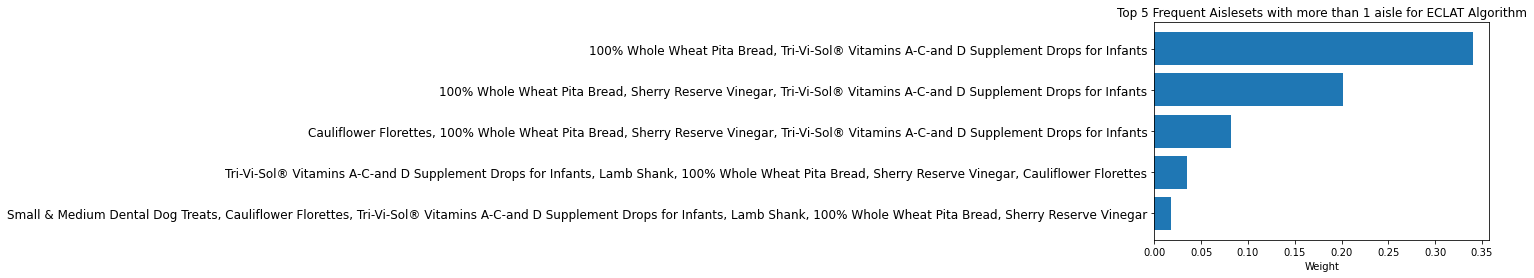

In [52]:
# plot frequent_itemsets_apriori_2 with product name and itemset

import matplotlib.pyplot as plt

# resize the plot
fig, ax = plt.subplots()
ax.barh(filtered_frequent_itemsets_eclat_df.head()['itemsets'].map(lambda x: ', '.join(aisle_id_product_name_mapping[item] for item in x)), filtered_frequent_itemsets_eclat_df.head()['weight'], align='center')
ax.set_yticks(filtered_frequent_itemsets_eclat_df.head()['itemsets'].map(lambda x: ', '.join(aisle_id_product_name_mapping[item] for item in x)))
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weight')
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
# wrap the product name
ax.set_title('Top 5 Frequent Aislesets with more than 1 aisle for ECLAT Algorithm')
plt.show()

In [29]:
# Create a DataFrame from the filtered frequent itemsets

filtered_frequent_itemsets_eclat_df = pd.DataFrame(filtered_frequent_itemsets_eclat, columns=['itemsets', 'support'])
filtered_frequent_itemsets_eclat_df['source'] = filtered_frequent_itemsets_eclat_df['itemsets'].apply(lambda x: list(x)[0])
filtered_frequent_itemsets_eclat_df['target'] = filtered_frequent_itemsets_eclat_df['itemsets'].apply(lambda x: list(x)[1])
filtered_frequent_itemsets_eclat_df = filtered_frequent_itemsets_eclat_df.rename({'support': 'weight'}, axis='columns')
filtered_frequent_itemsets_eclat_df

,itemsets,weight,source,target
0,"{24, 83}",0.340653,24,83
1,"{24, 123, 83}",0.201250,24,123
2,"{24, 123, 120, 83}",0.081535,24,123
3,"{24, 83, 123, 120, 84}",0.034776,24,83
4,"{21, 24, 83, 123, 120, 84}",0.017578,21,24
...,...,...,...,...
6205,"{79, 52}",0.007181,79,52
6206,"{72, 104}",0.007769,72,104
6207,"{50, 61}",0.007068,50,61
6208,"{4, 129}",0.008025,4,129


In [30]:
filtered_frequent_itemsets_eclat_df.sort_values(by='weight', ascending=False).head(10)

,itemsets,weight,source,target
0,"{24, 83}",0.340653,24,83
944,"{24, 123}",0.290620,24,123
2597,"{123, 83}",0.252450,123,83
1,"{24, 123, 83}",0.201250,24,123
1449,"{24, 120}",0.200204,24,120
1689,"{24, 84}",0.174254,24,84
1831,"{21, 24}",0.166131,21,24
2991,"{120, 83}",0.153990,120,83
3257,"{21, 83}",0.144868,21,83
3847,"{123, 120}",0.136649,123,120


/Users/mdodia/opt/miniconda3/envs/homework1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


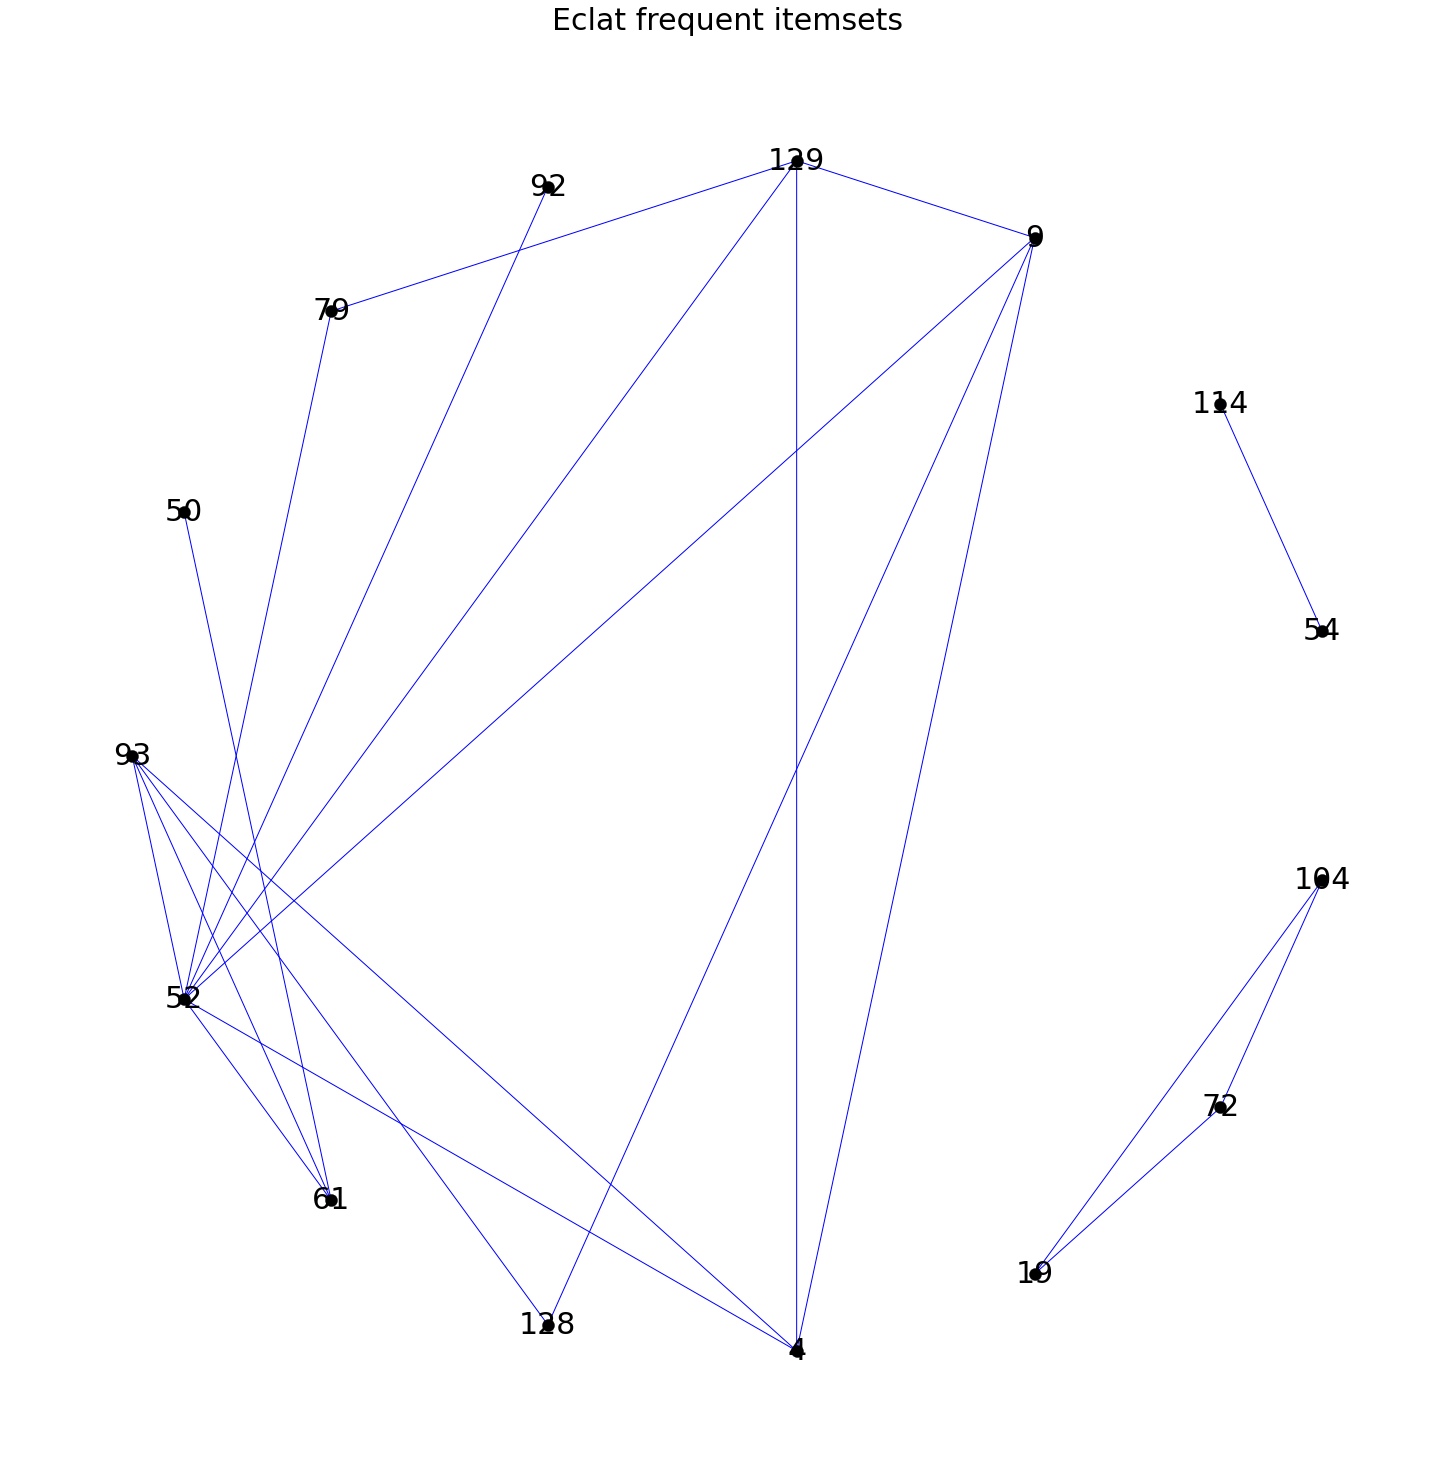

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

filtered_frequent_itemsets_eclat_plot_fp = filtered_frequent_itemsets_eclat_df[['source', 'target', 'weight']].copy().tail(20)

G = nx.Graph()
G = nx.from_pandas_edgelist(filtered_frequent_itemsets_eclat_plot_fp, 'source', 'target', ['weight'])

plt.figure(figsize=(20, 20))
# ax = plt.gca()
# ax.set_title('Random graph')
pos = nx.shell_layout(G)
nx.draw(G, with_labels=True, node_size=150, font_size=30, linewidths=0.25, node_color='black', edge_color='blue', pos=pos)
plt.title('Eclat frequent itemsets', fontsize=30)
plt.show()